### Titanic Data Analysis

In this project, we will be analyzing data associated with the tragic event of the sinking Titanic.  In particular, we will be interested in finding trends amongst the passengers who survived, and how they differed from the passengers who did not survive.

To begin the project, let's import a few libraries, as well as reading in the dataset to see what we are working with!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('titanic_data.csv')

It looks like the data read in okay.  Let's take a look at some of the characteristics of the data: 

1. Head, Tail, Rows, Columns
2. We want to make sure the column names are clean to work with
3. See if there are any missing data values or strange points we are working with that we might want to alter or remove.

In [3]:
df.head() #first look - it is pretty clean looking

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here we can see that it looks like we have 12 variables:


| **Variable**  | **Description**  |
|---|---|
| `PassengerId`  |  a unique id for each passenger  | 
| `Survived`  | 1 if a passenger survived and a 0 if they did not survive  | 
|  `Pclass` |  the class of seating the passenger was sitting in (in the header we can see 1 and 3, but we can look into this more) | 
| `Name`  |  the name of the passenger (we could try to parse this, but that might be unnecessary to gain any true insight into survival) | 
| `Sex`  |  the gender of the passenger  | 
| `Age`  |  the age of the passenger  | 
| `SibSp`  |  number of siblings and spouses aboard  | 
| `Parch`  |  number of parents/children aboard  | 
| `Ticket`  |  ticket number (again, I am not sure the potential advantages of parsing this)  | 
| `Fare`  |  how much was paid for the ticket  | 
| `Cabin`  |  looks like a cabin room number (some NaN's here, but I am not sure we want to use this anyway)  | 
 |`Embarked`| where the passenger has embarked to/from (looks like there are three possibilities based on some Kaggle docs: C, Q, S)|
 
 Parsing this table down to the variables we might spend the most time looking at, I imagine the 7 variables we will spend time looking at being the following:
 
 
| **Variable**  | **Description**  |
|---|---|
| `Survived`  | 1 if a passenger survived and a 0 if they did not survive  | 
|  `Pclass` |  the class of seating the passenger was sitting in (in the header we can see 1 and 3, but we can look into this more) | 
| `Sex`  |  the gender of the passenger  | 
| `Age`  |  the age of the passenger  | 
| `SibSp`  |  number of siblings and spouses aboard  | 
| `Parch`  |  number of parents/children aboard  | 
|`Embarked`| where the passenger has embarked to/from (looks like there are three possibilities based on some Kaggle docs: C, Q, S)|


It looks like the column names are already pretty clean - no spaces or strange characters or numbers at the beginning.  So, we will go ahead and keep moving ahead with the analysis to see where it takes us!

In [4]:
df.shape #891 passengers with 12 variables

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Scattered ideas of the above summary statistics

Looks like there are some people with missing ages, but nothing looks too out of the ordinary here.  All the survivals are marked with either 0 or 1, the max number of siblings or spouses is 8, while most people seem to be traveling without family.  Additionally, the number of parents or children has a max of 6, but most people are traveling without these family members.  We can see the median fare price was just under 15, but the max someone paid is almost 40 times that - hopefully they were first class!!  It looks like the classes are from 1 to 3, where most are in 3rd.  I would imagine this to be the lowest class.  There are some babies on board, as well as someone at the age of 80!  Though most people appear to be between the ages of 20 and 40.  We can ignore the passengerid - it really isn't a numeric value.  It looks like only about 38% of individuals survived of the almost 900 aboard...

### Not much cleaning to be done, but...

Though the dataset is pretty clean, let's make dummy variables for `gender` and `embarked`.  This will make it easier to do certain types of analysis - we can also get quick summary stats and add them to the above table easily if we make them dummy variables!

Additionally, there is a function that will help when we want to group our data based on whether or not the individuals survived.  You will see these two functions used on occasion below.

In [6]:
def dummify(df, columns):
    '''
    INPUT:
    df - the dataframe holding the columns you would like to create dummy variables for
    columns - list of the column names of the columns you want dummies for
    OUTPUT:
    df - now with the necessary dummy columns 0-1 coded with the final variable alphabetically as 0 variable, and the original column removed
    '''
    for col in columns:
        just_dummies = pd.get_dummies(df[col])
        df = pd.concat([df, just_dummies], axis=1)      
        df.drop([col, just_dummies.columns[-1]], inplace=True, axis=1)
    return df

def survival_group(data, col):
    '''
    data: a dataframe
    col:  which column(s) to group the data by; 
          to group by more than 1 column, this arg should be a list
    Returns: <float> proportion survived per group or subgroup
    Usage example:
        survival_group(df, 'Pclass')
    '''
    return data.groupby(col)['Survived'].sum()/data.groupby(col)['Survived'].count()


Now that we have the above function, let's use it on the two columns we want to create dummy variables for:

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Looks like these new variables didn't have any missing data (NICE).  Additionally, a majority of our passengers were male (around 65%), and a majority of passengers are embarking `C`.  However, there is a reasonably even spread across the three destinations.  As a final cleaning step before we build some plots, let's create a column that keeps track of which rows have a missing `Age` - just in case that is important for later.  

In [8]:
df['AgeMissing'] = np.isnan(df['Age'])

Just because I like to double check...

In [9]:
df.AgeMissing.mean()

0.19865319865319866

In [10]:
1 - 714/891 #Looks right

0.19865319865319864

### Quick Sanity Check

The below plot (although incredibly hard to read) serves as a reasonable sanity check that all of our data seems reasonable.  Although NaN values are dropped in these plots, we can make sure there aren't clusters of data in places we think are unreasonable - like if we saw almost everyone was between age 0 and 1 or something...  Everything looks pretty reasonable here.  All the dichotomous variables appear to be correctly labeled.  The quantitative variables are mostly right skewed.  The dummy variables we created look like they are showing up correctly.  Nothing crazy going on here.

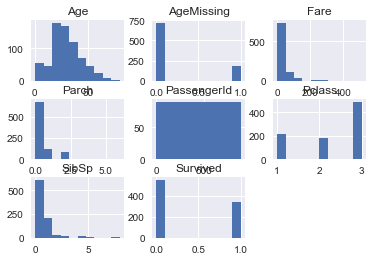

In [11]:
df.hist();

### Is age associated with surviving?

The below plot does suggest that younger individuals do seem more likely to live - particularly the super young.  We see this with the spike right away in the survival histogram.  **However, besides very young children seeming slightly more likely to survive, there does not appear to be an overwhelming association between age and survival.  **

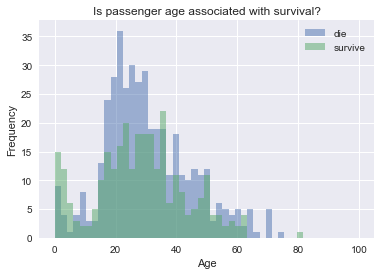

In [12]:
bins = np.linspace(0, 100, 50)

df.query('Survived == 0')['Age'].hist(bins=bins, alpha = .5, label = 'die');
df.query('Survived == 1')['Age'].hist(bins=bins, alpha = .5, label = 'survive');
plt.legend(loc='upper right')
plt.title('Is passenger age associated with survival?');
plt.xlabel('Age');
plt.ylabel('Frequency');

### Is the Fare Price Associated with Survival?

It does appear that fare price is associated with survival.  The more you paid for your ticket, the more likely you were to live.  **Look at the huge spike associated with those who all paid a reasonably low price associated with death.  Where those who paid more than approximately 50 for their ticket appear to have lived in most cases.  Those who paid the lowest price all died...we can see this from the first blue histogram bar.**

We might dig into this a bit more to see if those who were kids with a large fare price were more likely to survive than those who were kids with a lower fare price were less likely to survive.  The split of this would have to by somewhat arbitrary - what deems a fare price as large?  Maybe there are three categories?  Instead of trying to determine this cutoff ourself, we might just use the `class` variable that already exists in our dataset.

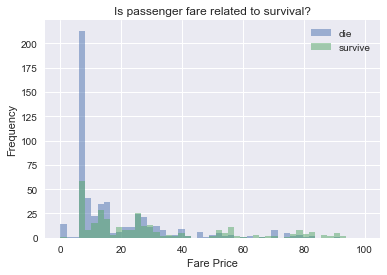

In [13]:
bins = np.linspace(0, 100, 50)

df.query('Survived == 0')['Fare'].hist(bins=bins, alpha = .5, label = 'die');
df.query('Survived == 1')['Fare'].hist(bins=bins, alpha = .5, label = 'survive');
plt.legend(loc='upper right')
plt.title('Is passenger fare related to survival?');
plt.xlabel('Fare Price');
plt.ylabel('Frequency');

### Is the class of a passenger associated with survival?

All of the next analyses are to study survival based on gender and class.  The below plot shows this in an ideal way with a side by side bar chart.  ALl of the subsequent analyses are simply to numerically evaluate what is shown visually here.

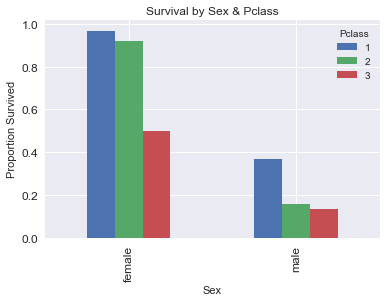

In [14]:
dfSP = survival_group(df, ['Sex','Pclass']).unstack()
dfSP.plot(kind='bar', fontsize=12, title='Survival by Gender & Pclass').set_ylabel('Proportion Survived');

In [15]:
df.query('Pclass == 1 and Survived == 1').count()['Survived']/df.query('Pclass == 1').count()['Survived']

0.62962962962962965

In [16]:
df.query('Pclass == 2 and Survived == 1').count()['Survived']/df.query('Pclass == 2').count()['Survived']

0.47282608695652173

In [17]:
df.query('Pclass == 3 and Survived == 1').count()['Survived']/df.query('Pclass == 3').count()['Survived']

0.24236252545824846

In [18]:
pd.crosstab(df['Survived'], df['Pclass'], rownames=['Survived'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


A visual of the above summary is provided as a heatmap below.  You can see the dark purple in the top right shows that the 3rd class mostly earned a 0 in survival - this is bad news for those passengers.  Where the light color in the top left shows that the 1st class passengers had much fewer deaths.  

**Specifically, we can see that approximately 63% of all first class passengers survived. Only 47% of the second class passengers survived.  Finally, only 24% of the third class class passengers survived. ** 

### Is Gender Associated with survival?  And further is there a relationship between all of age, gender, and class?  I would imagine the young, first class passengers would be most likely to survive, regardless of gender.  Maybe a close next group of survivors would be first and/or second class females who are younger than a certain threshold?

As we start getting into these higher interactions of variables, it might be better to look at some sort of regression model to determine the relationship...We could also try a more sophisticated machine learning technique that might take care of looking at all of these interactions without us having to do too much work.

In [19]:
df = dummify(df, ["Sex", "Embarked"])
df.query('female == 0 and Survived == 1').count()['Survived']/df.query('female == 0').count()['Survived']

0.18890814558058924

In [20]:
df.query('female == 1 and Survived == 1').count()['Survived']/df.query('female == 1').count()['Survived']

0.7420382165605095

In [21]:
pd.crosstab(df['Survived'], df['female'], rownames=['Survived'])

female,0,1
Survived,,
0,468,81
1,109,233


**Less than 20% of the males survived, while nearly 75% of the female passengers survived.**

### We Found Some Associations... 

Let's see how we can do at predicting survival based on the possible predictor variables.  The easiest way to do this, while also retaining the ability to understand the impact of individual variables in a fairly straightforward way.  First, let's import the necessary library, and add an intercept to our dataframe.  Additionally, I will add some interaction variables to see if our model suggests these are 'significant' for predicting survival.  Also, we had a few missing age values.  Here will fill those, as our model will drop those columns otherwise.  Since age wasn't greatly associated, hopefully this won't have too much of an impact.  I always feel icky about inputting missing values.

In [22]:
import statsmodels.api as sm

df['intercept'] = 1; # add intercept
df['Age'] = df['Age'].fillna(df['Age'].mean()) # fill NA values for age
df['age_gend'] = df['Age']*df['female'] # interaction between age and gender
df['age_class'] = df['Age']*df['Pclass'] # interaction between class and age
df['class_gend'] = df['Pclass']*df['female'] # interaction between class and gender
df['age_gend_class'] = df['class_gend']*df['Age'] # interaction between class, gender, and age

/Users/joshuabernhard/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now that we have created all of the interaction variables, replaced the missing values in the age variable, and added an intercept; we can create our explanatory matrix and our response vector.

In [23]:
y, X = df['Survived'], df[['intercept','Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'C', 'Q', 'age_gend', 'age_class', 'class_gend', 'age_gend_class']]

In [24]:
mod = sm.Logit(y, X) # instantiate our model with our X and y created above

In [25]:
results = mod.fit() # fit the model

Optimization terminated successfully.
         Current function value: 0.422121
         Iterations 8


Before I trust the results of any model, I like to see how well the model performs.  In our case, our model is meh... It isn't terrible, but our results are in no way outstanding.  Below is a table that shows the results of comparing our predictions on the data to a model that was fit using ALL of the data.  Let's go through what these results mean. 

An ideal case would be for all of our values to live in the top left and the bottom right corners of the below grid.  **The top left are the individuals who did not survive, and were correctly labeled as not surviving (nearly 500 of them).**  Alternatively, the 50 represents the individuals who did not survive that our model labeld as surviving.

In the second row the 230 represents **individuals who survived who were correctly labeled by our model as surviving.** Alternatively, the 112 represents the individuals who were incorrectly labeled. These individuals survived, but were labeled as non-survivors by our model.
 
|   |            |Predicted|        |
|:-:|:----------:|:-------:|:------:|
|   |            | Die     | Survive|
|**Truth** | Die | 499     | 50     |  
|   | Survive    | 112     | 230    |

From this, we can see that our model correctly identifies 729 individuals, while incorrectly classifying 162 individuals.  Really, this would pretty good if the model was fit on 

In [26]:
results.pred_table()

array([[ 499.,   50.],
       [ 112.,  230.]])

Anyhow, let's jump into the specific coefficients to see what looks to be associated with survival.

In [27]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.366     
Dependent Variable: Survived         AIC:              778.2203  
Date:               2017-08-01 09:52 BIC:              840.5208  
No. Observations:   891              Log-Likelihood:   -376.11   
Df Model:           12               LL-Null:          -593.33   
Df Residuals:       878              LLR p-value:      1.9012e-85
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
intercept          0.6081   0.8676  0.7009 0.4834 -1.0924  2.3086
Pclass            -0.1531   0.3756 -0.4077 0.6835 -0.8894  0.5831
Age               -0.0084   0.0228 -0.3680 0.7129 -0.0531  0.0363
SibSp             -0.3538   0.1134 -3.1200 0.0018 -0.5760 -0.1315
Parch             -0.0685   0.1251 -0.5472 0.5842 -0.3137  0.1767
Fare               0.0015   0.0025  0.6122 0.5404 -0.0033  0.0063
female             5.0097   2.3921  2.0943 0.0362  0.3213  9.6980
C                  0.5135   0.2431  2.1120 0.0347  0.0370  0.9901
Q                  0.5682   0.3175  1.7897 0.0735 -0.0541  1.1905
age_gend           0.0310   0.0714  0.4340 0.6643 -0.1090  0.1709
age_class         -0.0245   0.0118 -2.0821 0.0373 -0.0475 -0.0014
class_gend        -1.4238   0.8738 -1.6295 0.1032 -3.1364  0.2888
age_gend_class     0.0069   0.0273  0.2520 0.8010 -0.0467  0.0605
=================================================================

"""

### Results Summary Walk Through

So, we could talk about likelihoods, but seriously calculus - what is this high school?  So, instead let's look at the column that looks like **P>|z|** - oh wait, this is calculus too.  Integrating some stuff!  In any case, this column can provide us the probability of observing our resulting coefficient estimate from the data if there actually is a 0 coefficient.  Usual cutoffs that suggest significance are at 0.05 or 0.01 for medical purposes.  Based on our results, we have statistically significant evidence to suggest a relationship exists between survival and:

1. **SibSp** - Remember this was the siblings/spouses.  There is evidence to suggest that the more siblings and spouses an individual has aboard, the less likely they are to survive.

2. **Gender** - As we saw earlier, females appear to be MUCH more likely to survive than males.  This seems to be the largest indicator of survival given the magnitude of its coefficient.

3. **Embarked C** - Individuals embarking from C are more likely to survive than those that embarked from S.

4. **Age Class Interaction** - Though neither age nor class was significantly related.  The interaction of these two variables does appear to have a significant relation with survival.  The size of the coefficient is not large enough to mean too much, but it is statistically significant.

Given the small size of many of these coefficients, I imagine running some sort of Ridge, Lasso, or Elastic Net might remove most of these with even a reasonably small weight.  


### Interpret the Coefficients

In order to interpret the coefficients in a logistic regression model, we need to exponentiate them.  Then I find it easier to interpret those that are less than one by taking the reciprical.  Let's see how this works.  Here is the exponential of all the coefficients we marked as significant.  

In [28]:
np.exp(results.params)[['SibSp', 'female', 'C', 'age_class']] 

SibSp          0.702042
female       149.854257
C              1.671147
age_class      0.975822
dtype: float64

We have two that are less that are below 1, so we will take the reciprical of these.  

In [29]:
1/np.exp(results.params)[['SibSp', 'age_class']] 

SibSp        1.424417
age_class    1.024777
dtype: float64

Now we can interpret these in the following way:

Being female means that the odds of survival are nearly 150 times the odds of survival for a male, holding all other model variables constant.

Additionally, for each fewer sibling or spouse onboard your likelihood of surviving are 1.42 times those with the additional sibling/spouse, holding all other model variables constant.  

The interaction variable isn't exactly 'nicely' interpretable here - interactions are always a bit tricky.  With more effort, we could gain some insight into what is happening with the interaction, but it's a small coefficient - I am not sure it is worth the effort.  The 'C' coefficient essentially tells us these individuals are more likely to survive than the 'S' individuals.

### Conclusions

In this project, we looked at a number of parts to analyzing data that are essential to any data analysts skill set.  We dealt with data cleaning in a few ways:

1. Adding dummy variables.
2. Filling in missing values (or at least working with missing values)

There are potential shortcomings based on the interpretations we want to make based on this coding - which a 1, -1 coding might have provided. Additionally, filling in missing values always leads to potential issues with an analysis.  Moving all of our predictions towards the mean, as opposed to finding what differentiates these rows to better predict whether an individual will survive or not.  We could have filled in the ages based on what a text title suggests or based on a regression model to fit the ages...  That would have likely been better than the current method I am using, but also would have required more effort.

We also looked at the relationships of many variables with the chance of survival.  We found that the most associated factor to survival was gender.  Although class and age together appeared to also associate with survival - likely younger and higher classes based on our exploratory analysis at the beginning.  The number of spouses and siblings also appeared to be associated with survival.  Having these members aboard meant that an individual was less likely to survive.  The final characteristic with some association was `Embarked`, who would have guessed.  These last two columns that showed some relevence were variables I wouldn't have guessed to be associated with survival, but that is why we have a need for data at all.  

**None** of these statements are statements of **causation**.  We simply have association here.  In order to prove cause and effect relationships, we would need a well designed experiment where we can control for all confounding factors. 

As a final step in this analysis - if I wanted to predict survivors of a future sinking ship, I would cross-validate a strong machine learning technique.  We could then come up with a model that could be let out into the wild to predict survivorship of future cruise ships.